<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Data_Retail_Raw_Reduced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/retail_raw_reduced.csv')
df

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


In [ ]:
df['total'] = df['quantity'] * df['item_price']

In [ ]:
#dapatkan quantity berdasarkan tanggal
date_quantity_sum = df[['quantity']].groupby(df.order_date).agg(['sum', 'max'])
date_quantity_sum

quantity     
                sum  max
order_date              
2019-07-01      151   16
2019-07-02      355  120
2019-07-03      198   25
2019-07-04      344  120
2019-07-05      380  144
...             ...  ...
2019-12-26      496  100
2019-12-27      134   24
2019-12-29      234   25
2019-12-30      875  144
2019-12-31      471   72

[157 rows x 2 columns]

In [ ]:
#dapatkan insight berdasarkan pembeli
cust_quantity_sum = df[['quantity']].groupby(df.customer_id).agg(['sum'])
cust_quantity_sum = cust_quantity_sum.reset_index()
cust_quantity_sum

# cust_quantity_sum.reset_index().max()
# cust_quantity_sum.max()
# cust_quantity_sum

,customer_id,quantity
,,sum
0,12391,10
1,12420,1
2,12471,52
3,12472,60
4,12474,49
...,...,...
1768,18265,36
1769,18272,17
1770,18282,2


In [ ]:
#dapatkan insight penjualan quantity brand
brand_quantity_sum = df[['quantity']].groupby(df.brand).agg(['sum', 'mean'])
brand_quantity_sum = brand_quantity_sum.reset_index()

def singkat_brand(data):
  return data[0] + data[-1]

brand_quantity_sum['brand'] = brand_quantity_sum['brand'].apply(singkat_brand)

brand_quantity_sum

brand quantity           
             sum       mean
0    BA     5752  13.470726
1    BB     3964  11.523256
2    BC     5366  10.011194
3    BH     3238  10.150470
4    BJ     4926  14.748503
5    BL     3090   8.262032
6    BP    10130  15.233083
7    BR     5316   8.478469
8    BS     9645   9.752275
9    BW     5609  14.568831

In [ ]:
from bokeh.models.mappers import CategoricalColorMapper
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
import random

def r():
  return random.radiant(0,255)

output_notebook()

# color_mapper = CategoricalColorMapper(
#     factors = brand_quantity_sum['brand'],
#     palette = [for 'b' in brand_quantity_sum['brand']]
# )

# color_dict = {'field' : 'brand', 'transform' : color_mapper}

fig = figure(x_range=brand_quantity_sum['brand'], plot_width=570, plot_height=350)
fig.vbar(x=brand_quantity_sum['brand'], 
         top=brand_quantity_sum['quantity']['sum'], 
         width=0.7)
show(fig)

In [ ]:
import matplotlib.pyplot as plt

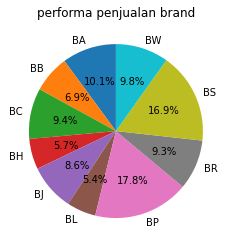

In [ ]:
#plot pie
plt.pie(brand_quantity_sum['quantity']['sum'],
        labels=brand_quantity_sum['brand'],
        startangle=90,
        autopct='%.1f%%' #persentase
        )

#add title to graph
plt.title("performa penjualan brand")

#draw the chart
plt.show()

# Insight Sarung Lebaran

In [ ]:
from pandas._libs.tslibs.period import DIFFERENT_FREQ
import random

def brand_printing_tenun(data):
  return random.choice(['printing', 'tenun'])

def kecubung_ardan(data):
  return random.choice(['SK01', 'SA01'])

df_sarung = df.copy()

df_sarung.rename(columns={'brand': 'jenis'}, inplace=True)
df_sarung['jenis'] = df_sarung['jenis'].apply(brand_printing_tenun)
df_sarung['product_id'] = df_sarung['product_id'].apply(kecubung_ardan)
df_sarung

,order_id,order_date,customer_id,city,province,product_id,jenis,quantity,item_price,total
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,SA01,tenun,10,740000,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,SA01,tenun,2,604000,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,SK01,tenun,8,1045000,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,SK01,printing,4,205000,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,SA01,tenun,2,4475000,8950000
...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,SK01,printing,2,450000,900000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,SA01,tenun,3,1465000,4395000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,SK01,tenun,4,747000,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,SK01,printing,8,695000,5560000


In [ ]:
jenis_quantity_sum = df['quantity'].groupby([df_sarung.product_id, df_sarung.jenis]).agg(['sum'])
jenis_quantity_sum = jenis_quantity_sum.reset_index()
jenis_quantity_sum

,product_id,jenis,sum
0,SA01,printing,13573
1,SA01,tenun,14603
2,SK01,printing,14363
3,SK01,tenun,14497


In [ ]:
sarung_pivot = jenis_quantity_sum.pivot(index = 'product_id', columns = 'jenis', values = ['sum'])
sarung_pivot

sum       
jenis      printing  tenun
product_id                
SA01          13573  14603
SK01          14363  14497

In [ ]:
prov_quantity_sum = df['quantity'].groupby([df_sarung.province]).agg(['sum'])
prov_quantity_sum = prov_quantity_sum.reset_index()
prov_quantity_sum

,province,sum
0,Bali,1874
1,Banten,2764
2,DKI Jakarta,26852
3,Jawa Barat,9613
4,Jawa Tengah,5578
5,Jawa Timur,4826
6,Yogyakarta,5529


In [ ]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper

output_notebook()

fig = figure(x_range=prov_quantity_sum['province'], plot_width=570, plot_height=350)
fig.vbar(
    x = prov_quantity_sum['province'],
    top = prov_quantity_sum['sum'],
    width = 0.7
)

show(fig)

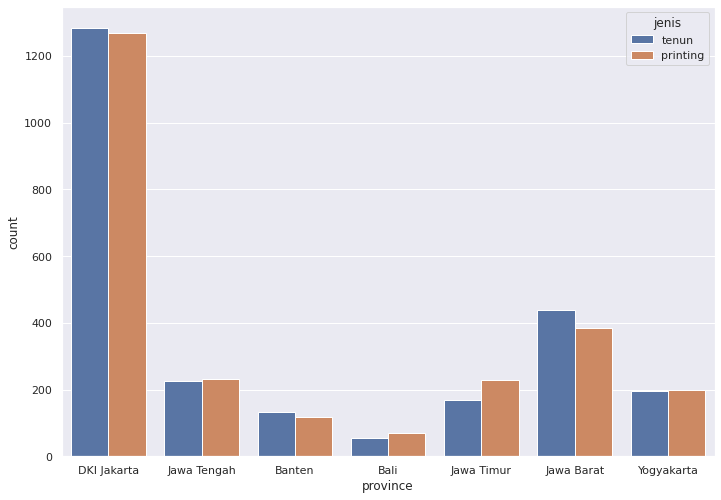

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (11.7, 8.27)})

sns.countplot(x='province', data=df_sarung, hue = 'jenis')
plt.show()

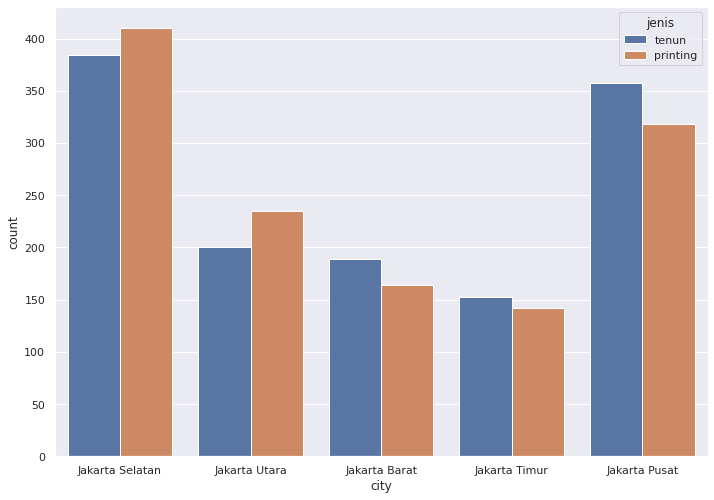

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (11.7, 8.27)})

jakarta_sarung_df = df_sarung[df.province == 'DKI Jakarta']

sns.countplot(x='city', data=jakarta_sarung_df, hue = 'jenis')
plt.show()

# Insight Otomotif

In [ ]:
df_otomotif = df.copy()

def model_car(data):
  if data == 'BRAND_A':
    return 'macan'
  if data == 'BRAND_B':
    return '911'
  if data == 'BRAND_R':
    return 'taycan'
  if data == 'BRAND_C':
    return 'cayanne'
  if data == 'BRAND_H':
    return 'panamera'
  if data == 'BRAND_S':
    return 'cayman'

df_otomotif.rename(columns = {'brand': 'model'}, inplace = True)
del df_otomotif['product_id']
df_otomotif['model'] = df_otomotif['model'].apply(model_car)
df_otomotif

,order_id,order_date,customer_id,city,province,model,quantity,item_price,total
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,None,10,740000,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,taycan,2,604000,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,cayanne,8,1045000,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,macan,4,205000,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,taycan,2,4475000,8950000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,taycan,2,450000,900000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,cayanne,3,1465000,4395000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,panamera,4,747000,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,cayanne,8,695000,5560000


In [ ]:
model_quantity_sum = df_otomotif['quantity'].groupby([df_otomotif.model]).agg(['sum'])
model_quantity_sum = model_quantity_sum.reset_index()
model_quantity_sum

,model,sum
0,911,3964
1,cayanne,5366
2,cayman,9645
3,macan,5752
4,panamera,3238
5,taycan,5316


In [ ]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper

output_notebook()

fig = figure(x_range = model_quantity_sum['model'], plot_width = 570, plot_height = 350)
fig.vbar(
    x = model_quantity_sum['model'],
    top = model_quantity_sum['sum'],
    width = 0.7
)

show(fig)

In [ ]:
model_quantity_sum = df_otomotif['quantity'].groupby([df_otomotif.model, df_otomotif.province]).agg(['sum'])

model_quantity_sum = model_quantity_sum.reset_index()
model_quantity_sum

,model,province,sum
0,911,Bali,91
1,911,Banten,84
2,911,DKI Jakarta,1072
3,911,Jawa Barat,558
4,911,Jawa Tengah,776
5,911,Jawa Timur,386
6,911,Yogyakarta,997
7,cayanne,Bali,68
8,cayanne,Banten,199
9,cayanne,DKI Jakarta,2599


In [ ]:
pivot_otomotif = model_quantity_sum.pivot(
    index = 'model',
    columns = 'province',
    values = 'sum'
)

pivot_otomotif.T

model,911,cayanne,cayman,macan,panamera,taycan
province,,,,,,
Bali,91,68,465,45,28,547
Banten,84,199,592,123,98,213
DKI Jakarta,1072,2599,4346,3916,1536,2436
Jawa Barat,558,812,1771,516,672,948
Jawa Tengah,776,654,613,226,232,450
Jawa Timur,386,491,1377,476,334,306
Yogyakarta,997,543,481,450,338,416


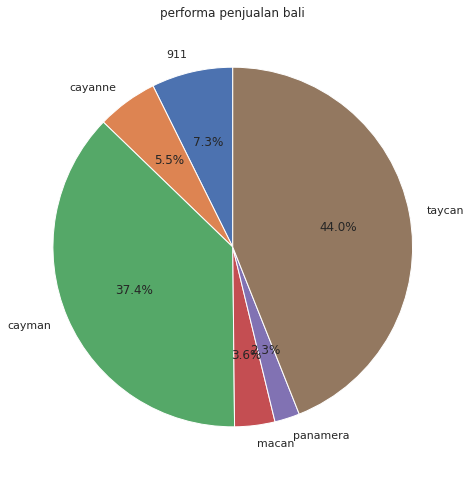

In [ ]:
import matplotlib.pyplot as plt

plt.pie(pivot_otomotif['Bali'],
        labels = pivot_otomotif.index,
        startangle = 90,
        autopct = '%.1f%%')

plt.title('performa penjualan bali')

plt.show()

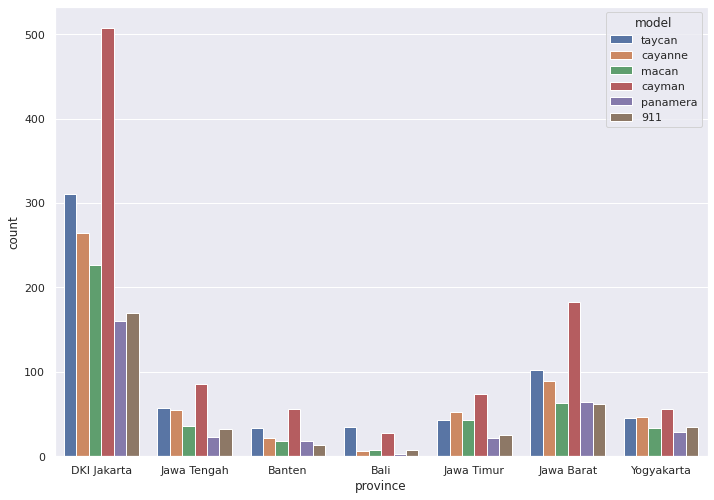

In [ ]:
sns.set(rc = {'figure.figsize' : (11.7, 8.27)})

sns.countplot(x = 'province', data = df_otomotif, hue = 'model')

plt.show()